In [2]:
# Importing libraries

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score, silhouette_score

In [3]:
csv_file_path= r'D:\Projects\ML Mini Project\water_potability.csv'
df = pd.read_csv(csv_file_path)

In [4]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [5]:
df.tail()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1
3275,7.874671,195.102299,17404.177061,7.509306,NaN,327.459760,16.140368,78.698446,2.309149,1


In [6]:
df.size

32760

In [7]:
df.shape

(3276, 10)

In [8]:
df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [9]:
df['Potability'].unique()


array([0, 1], dtype=int64)

In [10]:
df.dtypes

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object

In [11]:
df['Potability'].value_counts()

Potability
0    1998
1    1278
Name: count, dtype: int64

In [12]:
df.duplicated().sum()

0

<Axes: >

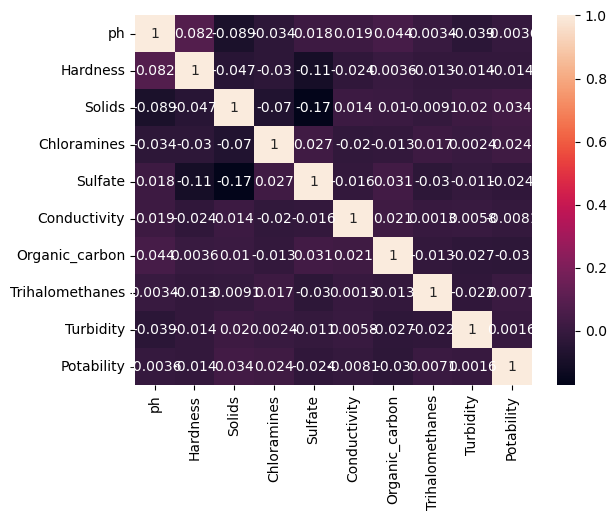

In [13]:
numeric_crop = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_crop.corr(),annot=True)

In [14]:
#Separating features and target labels
features = df[['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity']]
target = df['Potability']


In [15]:
# Hypothesis Testing
from scipy.stats import ttest_ind
import pandas as pd

# Replace these with your actual variable names from the dataset
potable_data = df[df['Potability'] == 1]
non_potable_data = df[df['Potability'] == 0]

# List of numerical variable names
numerical_variables = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']

# Perform t-tests for each numerical variable
for variable in numerical_variables:
    t_statistic, p_value = ttest_ind(potable_data[variable], non_potable_data[variable])
    
    # Check the p-value
    if p_value < 0.05:
        print(f"There is a significant difference in {variable} between potable and non-potable water.")
    else:
        print(f"There is no significant difference in {variable} between potable and non-potable water.")


#It appears from the results that, based on the t-tests conducted for each variable, 
#there is no significant difference in the means of the numerical variables (ph, Hardness, Solids, Chloramines, Sulfate, Conductivity, Organic_carbon, Trihalomethanes, Turbidity)
#between potable and non-potable water.

#This conclusion is drawn because for each variable, the p-value obtained from the t-test is greater than the chosen significance level (commonly 0.05). 
#In the context of hypothesis testing, a p-value above the significance level suggests that there is not enough evidence to reject the null hypothesis, which,
#in this case, would be that there is no difference in means between potable and non-potable water for the respective variable.



There is no significant difference in ph between potable and non-potable water.
There is no significant difference in Hardness between potable and non-potable water.
There is no significant difference in Solids between potable and non-potable water.
There is no significant difference in Chloramines between potable and non-potable water.
There is no significant difference in Sulfate between potable and non-potable water.
There is no significant difference in Conductivity between potable and non-potable water.
There is no significant difference in Organic_carbon between potable and non-potable water.
There is no significant difference in Trihalomethanes between potable and non-potable water.
There is no significant difference in Turbidity between potable and non-potable water.


In [30]:
'''
from scipy.stats import chi2_contingency

categorical_variable = 'Potability'
numerical_variables = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']

# Perform Chi-square test for each numerical variable
for variable in numerical_variables:
    contingency_table = pd.crosstab(df[categorical_variable], pd.qcut(df[variable], q=2, labels=['Low', 'High']))
    chi2_stat, p_value, _, _ = chi2_contingency(contingency_table)
    
    # Check the p-value
    if p_value < 0.05:
        print(f"There is a significant association between {variable} and {categorical_variable}.")
    else:
        print(f"There is no significant association between {variable} and {categorical_variable}.")
'''

There is no significant association between ph and Potability.
There is no significant association between Hardness and Potability.
There is no significant association between Solids and Potability.
There is no significant association between Chloramines and Potability.
There is no significant association between Sulfate and Potability.
There is no significant association between Conductivity and Potability.
There is no significant association between Organic_carbon and Potability.
There is no significant association between Trihalomethanes and Potability.
There is no significant association between Turbidity and Potability.


In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.impute import SimpleImputer


In [18]:
# Handle missing values
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Assuming 'Potability' is your target variable
X = df_imputed.drop('Potability', axis=1)
y = df_imputed['Potability']

In [19]:
# Check Class Distribution
print("Class distribution in target variable:", y.value_counts())

Class distribution in target variable: Potability
0.0    1998
1.0    1278
Name: count, dtype: int64


In [20]:
# Split the dataset into training and testing sets
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# Function to plot Confusion Matrix and ROC Curve
def plot_evaluation(model, Xtest, Ytest, model_name):
    # Confusion Matrix
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    y_pred = model.predict(Xtest)
    cm = confusion_matrix(Ytest, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f'{model_name} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

    # ROC Curve with AUC
    plt.subplot(1, 2, 2)
    y_pred_proba = model.predict_proba(Xtest)[:, 1]
    fpr, tpr, thresholds = roc_curve(Ytest, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{model_name} - Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")

    plt.tight_layout()
    plt.show()

Logistic Regression accuracy: 0.5198170731707317
Logistic Regression classification report:
              precision    recall  f1-score   support

         0.0       0.64      0.55      0.59       412
         1.0       0.38      0.47      0.42       244

    accuracy                           0.52       656
   macro avg       0.51      0.51      0.51       656
weighted avg       0.54      0.52      0.53       656



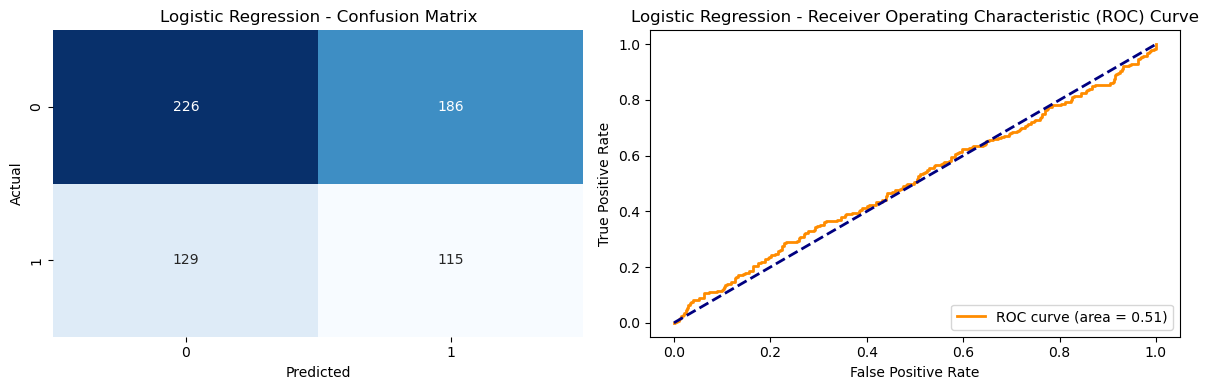

In [22]:
# Logistic Regression
lr_model = LogisticRegression(max_iter=3000, class_weight='balanced')
lr_model.fit(Xtrain, Ytrain)
print("Logistic Regression accuracy:", accuracy_score(Ytest, lr_model.predict(Xtest)))
print("Logistic Regression classification report:")
print(classification_report(Ytest, lr_model.predict(Xtest)))
plot_evaluation(lr_model, Xtest, Ytest, "Logistic Regression")

Decision Tree accuracy: 0.5777439024390244
Decision Tree classification report:
              precision    recall  f1-score   support

         0.0       0.68      0.62      0.65       412
         1.0       0.44      0.51      0.47       244

    accuracy                           0.58       656
   macro avg       0.56      0.56      0.56       656
weighted avg       0.59      0.58      0.58       656



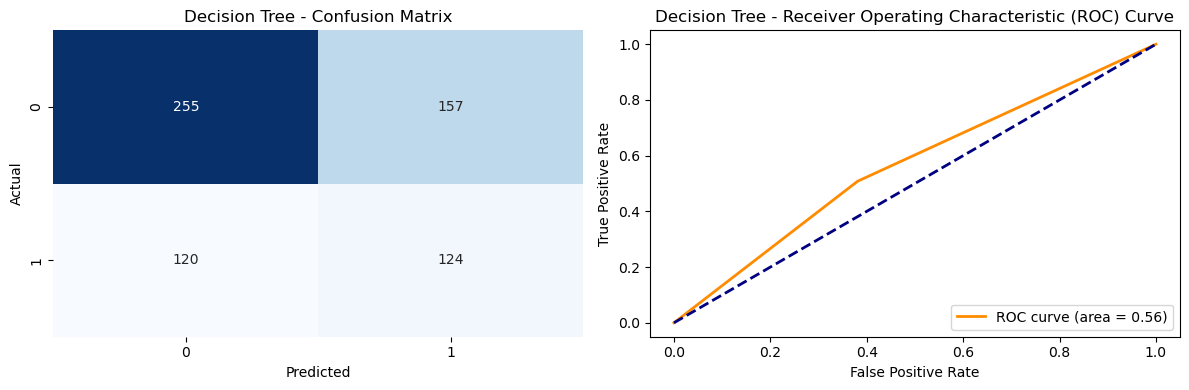

In [23]:
# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(Xtrain, Ytrain)
print("Decision Tree accuracy:", accuracy_score(Ytest, dt_model.predict(Xtest)))
print("Decision Tree classification report:")
print(classification_report(Ytest, dt_model.predict(Xtest)))
plot_evaluation(dt_model, Xtest, Ytest, "Decision Tree")


SVM accuracy: 0.5716463414634146
SVM classification report:
              precision    recall  f1-score   support

         0.0       0.63      0.78      0.69       412
         1.0       0.37      0.23      0.28       244

    accuracy                           0.57       656
   macro avg       0.50      0.50      0.49       656
weighted avg       0.53      0.57      0.54       656



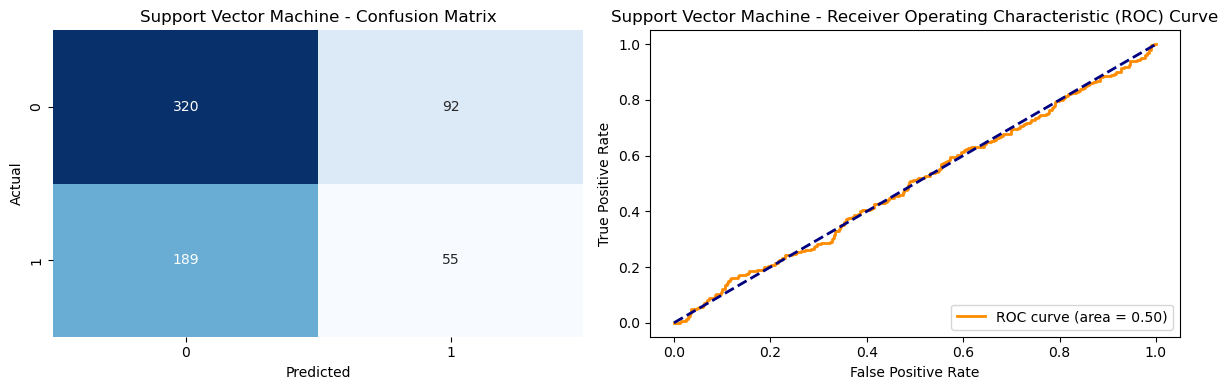

In [24]:
# Support Vector Machine
svm_model = SVC(probability=True, random_state=42,class_weight='balanced')
svm_model.fit(Xtrain, Ytrain)
print("SVM accuracy:", accuracy_score(Ytest, svm_model.predict(Xtest)))
print("SVM classification report:")
print(classification_report(Ytest, svm_model.predict(Xtest)))
plot_evaluation(svm_model, Xtest, Ytest, "Support Vector Machine")

k-NN accuracy: 0.5411585365853658
k-NN classification report:
              precision    recall  f1-score   support

         0.0       0.62      0.72      0.66       412
         1.0       0.34      0.25      0.29       244

    accuracy                           0.54       656
   macro avg       0.48      0.48      0.47       656
weighted avg       0.51      0.54      0.52       656



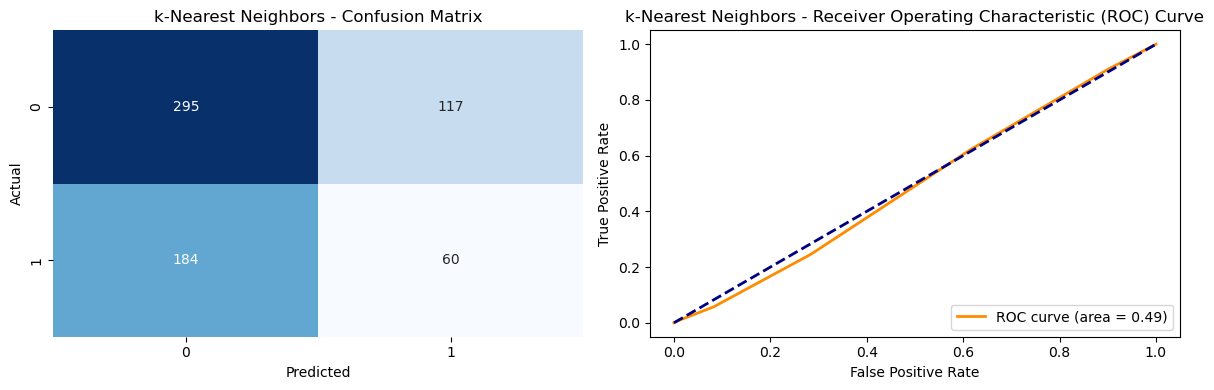

In [25]:
# k-Nearest Neighbors
knn_model = KNeighborsClassifier()
knn_model.fit(Xtrain, Ytrain)
print("k-NN accuracy:", accuracy_score(Ytest, knn_model.predict(Xtest)))
print("k-NN classification report:")
print(classification_report(Ytest, knn_model.predict(Xtest)))
plot_evaluation(knn_model, Xtest, Ytest, "k-Nearest Neighbors")

Random Forest accuracy: 0.6783536585365854
Random Forest classification report:
              precision    recall  f1-score   support

         0.0       0.70      0.86      0.77       412
         1.0       0.61      0.38      0.47       244

    accuracy                           0.68       656
   macro avg       0.65      0.62      0.62       656
weighted avg       0.67      0.68      0.66       656



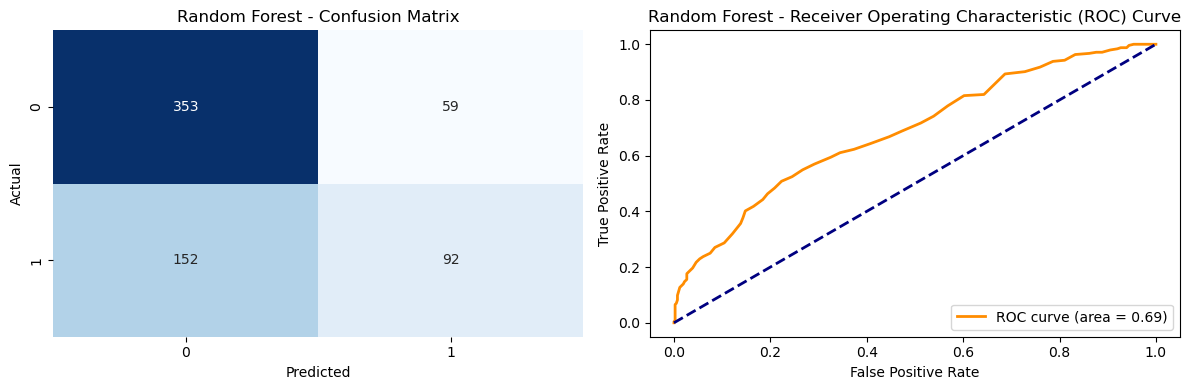

In [26]:
# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(Xtrain, Ytrain)
print("Random Forest accuracy:", accuracy_score(Ytest, rf_model.predict(Xtest)))
print("Random Forest classification report:")
print(classification_report(Ytest, rf_model.predict(Xtest)))
plot_evaluation(rf_model, Xtest, Ytest, "Random Forest")

In [27]:

# Scale the test data
scaler = StandardScaler()
Xtest_scaled = scaler.fit_transform(Xtest)

# K-Means
kmeans_model = KMeans(n_clusters=2, random_state=42,n_init='auto')
kmeans_model.fit(Xtrain)
kmeans_labels = kmeans_model.predict(Xtest)

# Evaluation metrics for clustering
print("K-Means Davies-Bouldin Score:", davies_bouldin_score(Xtest, kmeans_labels))
print("K-Means Calinski-Harabasz Score:", calinski_harabasz_score(Xtest, kmeans_labels))
print("K-Means Silhouette Score:", silhouette_score(Xtest, kmeans_labels))



K-Means Davies-Bouldin Score: 0.570477376486985
K-Means Calinski-Harabasz Score: 1218.076053350806
K-Means Silhouette Score: 0.5776501416812454


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(


In [28]:
# Hierarchical Clustering
hierarchical_model = AgglomerativeClustering(n_clusters=2)
hierarchical_labels = hierarchical_model.fit_predict(Xtest)

# Evaluation metrics for kmeans
print("Hierarchical Davies-Bouldin Score:", davies_bouldin_score(Xtest, hierarchical_labels))
print("Hierarchical Calinski-Harabasz Score:", calinski_harabasz_score(Xtest, hierarchical_labels))
print("Hierarchical Silhouette Score:", silhouette_score(Xtest, hierarchical_labels))

Hierarchical Davies-Bouldin Score: 0.57002390142687
Hierarchical Calinski-Harabasz Score: 1215.7180138292476
Hierarchical Silhouette Score: 0.5777137512192493


In [29]:
#Conclusion:
#In this water potability project, we applied an array of machine learning algorithms, encompassing Logistic Regression, Decision Tree, Random Forest, Support Vector Machine, k-Nearest Neighbors, K-Means, and Hierarchical Clustering, to predict water potability.
#While Logistic Regression achieved moderate accuracy, Decision Tree and Random Forest showcased robust performance by capturing intricate data relationships.
#Despite challenges faced by Support Vector Machine, K-Means and Hierarchical Clustering added depth to the analysis, offering insights into cluster formations.
#Statistical analysis through t-tests revealed no significant differences in means between potable and non-potable water.


'\nConclusion:\nIn this water potability project, we applied an array of machine learning algorithms, encompassing Logistic Regression, Decision Tree, Random Forest, Support Vector Machine, k-Nearest Neighbors, K-Means, and Hierarchical Clustering, to predict water potability.\nWhile Logistic Regression achieved moderate accuracy, Decision Tree and Random Forest showcased robust performance by capturing intricate data relationships.\nDespite challenges faced by Support Vector Machine, K-Means and Hierarchical Clustering added depth to the analysis, offering insights into cluster formations.\nStatistical analysis through t-tests revealed no significant differences in means between potable and non-potable water.\n'